In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [3]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [4]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [5]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [6]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [7]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [8]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [9]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [10]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [11]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [12]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [13]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [14]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [15]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'],
      dtype='object')

## dummies para tipodepropiedad

In [16]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.fit_transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [17]:
dummies=dummies.add_prefix('tipodepropiedad_')
dummies=dummies.astype(np.int8)
dummies_test=dummies_test.add_prefix('tipodepropiedad_')
dummies_test=dummies_test.astype(np.int8)

In [18]:
dummies.head()

,tipodepropiedad_0,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies_test.head()

,tipodepropiedad_0,tipodepropiedad_1,tipodepropiedad_2,tipodepropiedad_3,tipodepropiedad_4,tipodepropiedad_5,tipodepropiedad_6,tipodepropiedad_7,tipodepropiedad_8,tipodepropiedad_9,...,tipodepropiedad_13,tipodepropiedad_14,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos']

In [21]:
X=train[Numericos].join(dummies)
Y=train['precio']

In [22]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,tipodepropiedad_23,tipodepropiedad_24
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,3,2,2,144,166,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,1,1,63,67,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
Y.head()

0    2273000
1    3600000
2    1200000
3     650000
4    1150000
Name: precio, dtype: int32

# Armado de modelos

# BaseLine para nuestros modelos

## (1) Random Forest

In [24]:
from sklearn.ensemble  import RandomForestRegressor

In [25]:
RF_model=RandomForestRegressor()

In [26]:
RF_model.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
score1 = RF_model.score(X,Y)
score1

0.8879874742271868

## Agrego MAE score

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score1 = -scores.mean()
RF_mae_score1

899724.8202128211

In [29]:
importancias = pd.DataFrame(RF_model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
importancias.columns = ['feature', 'importancia']

In [30]:
importancias.feature

0                     antiguedad
1                   habitaciones
2                        garages
3                          banos
4                metroscubiertos
5                  metrostotales
6                       gimnasio
7                  usosmultiples
8                        piscina
9               escuelascercanas
10    centroscomercialescercanos
11             tipodepropiedad_0
12             tipodepropiedad_1
13             tipodepropiedad_2
14             tipodepropiedad_3
15             tipodepropiedad_4
16             tipodepropiedad_5
17             tipodepropiedad_6
18             tipodepropiedad_7
19             tipodepropiedad_8
20             tipodepropiedad_9
21            tipodepropiedad_10
22            tipodepropiedad_11
23            tipodepropiedad_12
24            tipodepropiedad_13
25            tipodepropiedad_14
26            tipodepropiedad_15
27            tipodepropiedad_16
28            tipodepropiedad_17
29            tipodepropiedad_18
30        

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]), <a list of 6 Text yticklabel objects>)

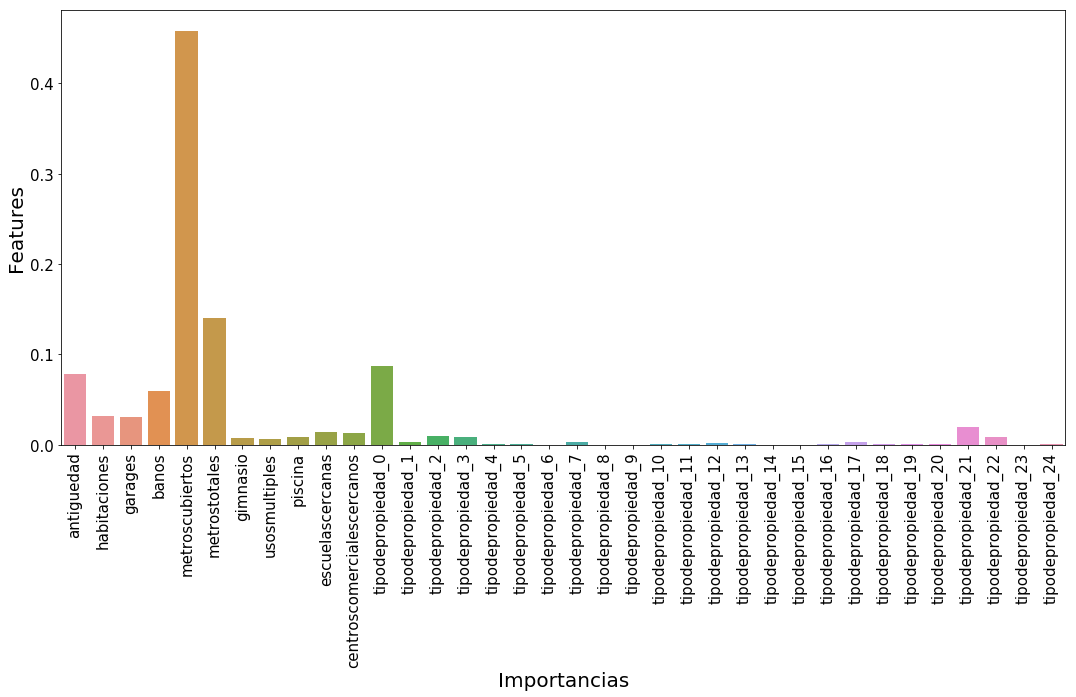

In [31]:
import seaborn as sns
plt.figure(figsize = (18,8))
graf = sns.barplot(x = importancias.feature, y = importancias.importancia, orient = 'v')
graf.set_xlabel("Importancias", fontsize = 20)
graf.set_ylabel("Features", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

## (2) KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [33]:
#Por default toma n = 5
KNN_model = KNeighborsRegressor()

In [34]:
KNN_model.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

## Utilizo la métrica MAE

In [35]:
# Con cross validation y n=5
scores = cross_val_score(KNN_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
KNN_mae_score1 = -scores.mean()

In [36]:
KNN_mae_score1

974501.2167283334

In [37]:
# Otra Alternativa
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)   

KNN_model.fit(X_train, Y_train) 
  
Y_pred = KNN_model.predict(X_test) 
  
KNN_mae_score2 = metrics.mean_absolute_error(Y_test, Y_pred) 
KNN_mae_score2


979899.3642249999

## KNN vs Random Forest

In [38]:
RF_mae_score1

899724.8202128211

In [39]:
KNN_mae_score1

974501.2167283334

## (3) Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression().fit(X, Y)
scores = cross_val_score(LR_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
LR_score1 = -scores.mean()

In [41]:
LR_score1

1033961.6781318441

**Evidentemente es mucho peor que KNN**

## (4) Árbol de Decisión

In [42]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor().fit(X, Y)
scores = cross_val_score(DTR_model , X, Y, scoring="neg_mean_absolute_error", cv=10)
DTR_score1 = -scores.mean()
DTR_score1

1091516.4333974402

**Hasta ahora el modelo que mejor resultado nos ha dado es Random Forest, seguido de KNN por lo que continuamos probando features con estos modelos**

# ¿Qué pasa ahora si sólo me quedo con los features más importantes?

In [43]:
#Tomo los 25 features más importantes
mas_importantes = importancias.nlargest(25, columns = 'importancia')


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5]), <a list of 6 Text yticklabel objects>)

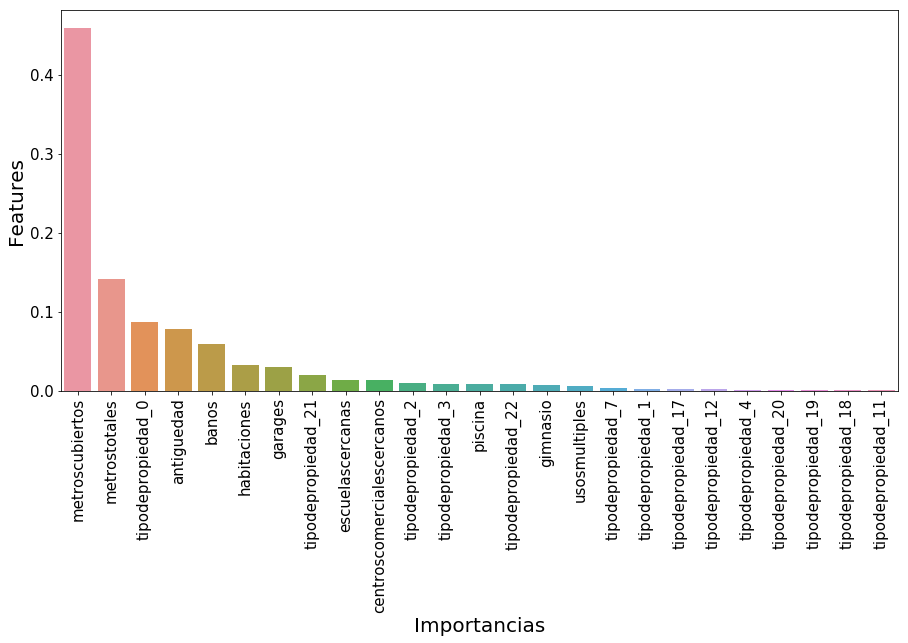

In [44]:
plt.figure(figsize = (15,7))
graf = sns.barplot(x = mas_importantes.feature, y = mas_importantes.importancia, orient = 'v')
graf.set_xlabel("Importancias", fontsize = 20)
graf.set_ylabel("Features", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

In [45]:
features_mas_importantes = mas_importantes.feature
X_reducido = X.loc[:, list(features_mas_importantes)]

## Random Forest

In [46]:
RF_model.fit(X_reducido,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
scores = cross_val_score(RF_model , X_reducido, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score2 = -scores.mean()
RF_mae_score2

902027.0318596568

## KNN

In [48]:
KNN_model.fit(X_reducido,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [49]:
#Cross validation
scores = cross_val_score(KNN_model , X_reducido, Y, scoring="neg_mean_absolute_error", cv=10)
KNN_mae_score1_2 = -scores.mean()
KNN_mae_score1_2

974573.6661383333

In [50]:
# Otra Alternativa
X_train, X_test, Y_train, Y_test = train_test_split(X_reducido, Y, test_size = 0.2, random_state = None)   

KNN_model.fit(X_train, Y_train) 
  
Y_pred = KNN_model.predict(X_test) 
  
KNN_mae_score2_2 = metrics.mean_absolute_error(Y_test, Y_pred) 
KNN_mae_score2_2


984197.4120291666

## ¿Se vió afectado el score (MAE) al quedarnos sólo con los 25 features más importantes?

In [51]:
#Random Forest 
print("¿Empeoró el score?",(RF_mae_score2 > RF_mae_score1))

¿Empeoró el score? True


In [52]:
#KNN versión 1
print("¿Empeoró el score?",(KNN_mae_score1_2 > KNN_mae_score1))

¿Empeoró el score? True


In [53]:
#KNN versión 2
print("¿Empeoró el score?",(KNN_mae_score2_2 > KNN_mae_score2))

¿Empeoró el score? True


Vemos que el score se ve desmejorado en todos los casos, por lo que no es una buena idea reducir los features en esa cantidad (25)

# ¿Qué pasa si normalizo los datos?

In [54]:
from sklearn import preprocessing 
def normalizar_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    np_scaled = min_max_scaler.fit_transform(df)
    return pd.DataFrame(np_scaled)

In [55]:
X_normalized = normalizar_data(X)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Random Forest

In [56]:
RF_model.fit(X_normalized, Y)
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score3 = -scores.mean()
RF_mae_score3

900628.8474218944

## ¿Se vió afectado el score (MAE) luego de normalizar los datos?

In [57]:
print("¿Empeoró el score?",(RF_mae_score3 > RF_mae_score1))

¿Empeoró el score? True


## Primer submit


Utilizo los datos sin normalizar

In [58]:
X_test = test[Numericos].join(dummies_test)
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_13,tipodepropiedad_14,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
def crear_submit(model, x_train, y_train, x_test, num):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    final = test.loc[:, ['id']]
    final['target'] = result
    ruta = "data/submit"+str(num)+".csv"
    #final.to_csv(path_or_buf = ruta, index = False )
    df = pd.read_csv(ruta)
    return df

In [60]:
#Tengo que reducir las columnas del train porque no matchean los tipos de propiedades con train y test
submit1 = crear_submit(RF_model,X.iloc[:,:34], Y, X_test, 1)
submit1.head()

,id,target
0,4941,3.165000e+06
1,51775,1.735654e+06
2,115253,2.705723e+06
3,299321,3.066997e+06
4,173570,5.622833e+05


## Hago un submit con los datos normalizados

In [61]:
X_test_normalized = normalizar_data(X_test)
X_test_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Tengo que reducir las columnas del train porque no matchean los tipos de propiedades con train y test
submit1 = crear_submit(RF_model,X_normalized.iloc[:,:34], Y, X_test_normalized, 2)
submit1.head()

,id,target
0,4941,2.788000e+06
1,51775,1.978764e+06
2,115253,2.092252e+06
3,299321,3.076112e+06
4,173570,7.200425e+05


## Mejor score hasta ahora con X_normalized y X_test_normalized

# Creo nuevos features

Aplico la SVD a los features que tengo hasta el momento, y veo dónde se concentra la energía de la matriz. La idea es crear nuevos features a partir de esta información.

In [63]:
from scipy.linalg import svd
from scipy.sparse.linalg import svds

In [64]:
## normalizamos/centramos utilizando la media de tal forma que el promedio sea 0
centered = X - X.mean()

In [65]:
centered.shape

(240000, 36)

In [66]:
centered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 36 columns):
antiguedad                    240000 non-null float64
habitaciones                  240000 non-null float64
garages                       240000 non-null float64
banos                         240000 non-null float64
metroscubiertos               240000 non-null float64
metrostotales                 240000 non-null float64
gimnasio                      240000 non-null float64
usosmultiples                 240000 non-null float64
piscina                       240000 non-null float64
escuelascercanas              240000 non-null float64
centroscomercialescercanos    240000 non-null float64
tipodepropiedad_0             240000 non-null float64
tipodepropiedad_1             240000 non-null float64
tipodepropiedad_2             240000 non-null float64
tipodepropiedad_3             240000 non-null float64
tipodepropiedad_4             240000 non-null float64
tipodepropiedad_5        

In [67]:
#hago lo mismo para el set de test
centered_test = X_test - X_test.mean()

In [68]:
centered_test.shape

(60000, 34)

## Calculo la SVD

In [69]:
u, s, vt = svd(centered, full_matrices = False)

In [70]:
u_test, s_test, vt_test = svd(centered_test, full_matrices = False)

In [71]:
s

array([5.46569598e+04, 2.89552509e+04, 4.22530408e+03, 4.10027696e+02,
       3.63667383e+02, 3.23393648e+02, 3.05567737e+02, 2.58404734e+02,
       1.65164910e+02, 1.47769812e+02, 1.13803066e+02, 1.04250876e+02,
       9.99845427e+01, 8.54631685e+01, 6.52154340e+01, 4.80765362e+01,
       3.99577521e+01, 3.73521076e+01, 3.66234060e+01, 2.78256083e+01,
       2.15162493e+01, 1.92245706e+01, 1.84485443e+01, 1.49031624e+01,
       1.35299502e+01, 1.29227726e+01, 1.21144021e+01, 1.16702798e+01,
       8.91107265e+00, 6.94117520e+00, 5.68711667e+00, 4.56084314e+00,
       2.28512581e+00, 1.04170263e+00, 9.99959075e-01, 5.33104331e-12])

Grafico los autovalores para detectar codos

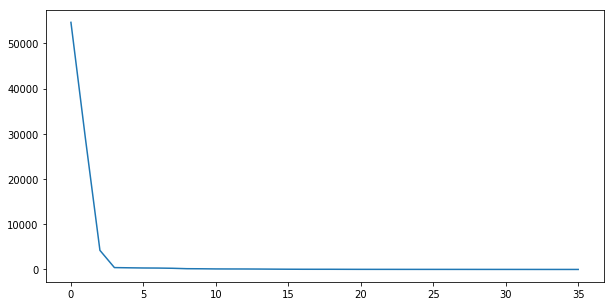

In [72]:
#Set train
plt.figure(figsize = (10,5))
plt.plot(s)

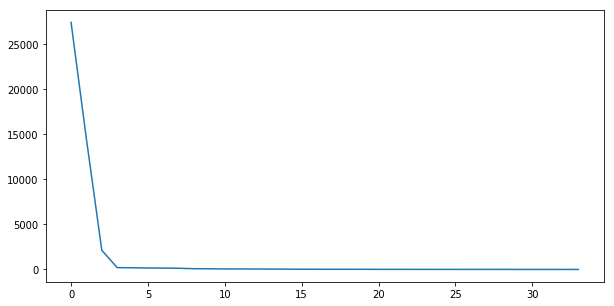

In [73]:
#Set test
plt.figure(figsize = (10,5))
plt.plot(s_test)

Claramente vemos como con 3 dimensiones podemos concentrar casi la totalidad de los datos. Veamos esto en niveles de energía

In [74]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
print(energy_percentage)

[7.77091733e+01 2.18090130e+01 4.64405425e-01 4.37328453e-03
 3.44025036e-03 2.72047236e-03 2.42882566e-03 1.73692985e-03
 7.09605411e-04 5.68005821e-04 3.36890895e-04 2.82709742e-04
 2.60044143e-04 1.89993755e-04 1.10632347e-04 6.01239754e-05
 4.15320571e-05 3.62920559e-05 3.48898266e-05 2.01405201e-05
 1.20424398e-05 9.61379031e-06 8.85330760e-06 5.77747688e-06
 4.76182841e-06 4.34402935e-06 3.81755513e-06 3.54277753e-06
 2.06557665e-06 1.25327784e-06 8.41328542e-07 5.41092630e-07
 1.35831838e-07 2.82272692e-08 2.60103263e-08 7.39274574e-31]


In [75]:
energy_total

3844312225.3598347

Ahora veo la energia acumulada 


**Set de train**

In [76]:
acumulated_energy = 0
for i in range(len(energy_percentage)):
    acumulated_energy = acumulated_energy + energy_percentage[i]
    print ('Number of Singular Values ' + str(i+1) + ': ' + str(singular_values[i]) + ' ' + str(round(acumulated_energy,2)) + '%')

Number of Singular Values 1: 54656.95975127302 77.71%
Number of Singular Values 2: 28955.250878045925 99.52%
Number of Singular Values 3: 4225.304075195341 99.98%
Number of Singular Values 4: 410.02769636107814 99.99%
Number of Singular Values 5: 363.66738263648045 99.99%
Number of Singular Values 6: 323.3936478295409 99.99%
Number of Singular Values 7: 305.56773661553086 100.0%
Number of Singular Values 8: 258.4047336677226 100.0%
Number of Singular Values 9: 165.1649101825018 100.0%
Number of Singular Values 10: 147.76981158243365 100.0%
Number of Singular Values 11: 113.80306618758048 100.0%
Number of Singular Values 12: 104.25087605515304 100.0%
Number of Singular Values 13: 99.98454269060112 100.0%
Number of Singular Values 14: 85.4631684975557 100.0%
Number of Singular Values 15: 65.21543397626348 100.0%
Number of Singular Values 16: 48.07653623455523 100.0%
Number of Singular Values 17: 39.95775205378842 100.0%
Number of Singular Values 18: 37.352107614655175 100.0%
Number of Si

Veo que con 3 dimensiones tengo el 99.98% de la energía acumulada, y con 7 llego a un 100%.

Puedo tomar las primeras 3 columnas de U y multiplicarlas por las 3 primeras filas y columnas de S y agregar esas columnas como features

In [77]:
#set de train
k = 3
aprox3 = np.matrix(u[:, :k]) * np.diag(s[:k]) 

In [78]:
features = pd.DataFrame(aprox3)
features.head()

,0,1,2
0,-133.929111,-16.609546,-0.467449
1,75.276285,-56.375915,-1.300524
2,-30.186889,10.374778,2.906306
3,-155.359735,-16.070155,6.419846
4,-112.836916,-14.313502,-2.386550


In [79]:
X_2 = X.iloc[:,:34]

In [80]:
X_2[['feature_svd1', 'feature_svd2', 'feature_svd3']] = features

In [81]:
X_normalized_2 = normalizar_data(X_2)
X_normalized_2.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153302,0.458186,0.875541
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504196,0.389820,0.865450
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327306,0.504577,0.916408
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117357,0.459113,0.958967
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188679,0.462133,0.852295


In [82]:
RF_model.fit(X_normalized_2, Y)
scores = cross_val_score(RF_model , X_normalized_2, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score4 = -scores.mean()
RF_mae_score4

893216.4709641114

In [83]:
#¿Qué paso con el score luego de agregar estos features?
print("¿Empeoró el score?",(RF_mae_score4 > RF_mae_score3))

¿Empeoró el score? False


In [84]:
#Set de test
aprox3_test = np.matrix(u_test[:, :k]) * np.diag(s_test[:k]) 

In [85]:
features_test = pd.DataFrame(aprox3_test)
features_test.head()

,0,1,2
0,98.364338,79.361017,-19.960875
1,-151.698287,18.429702,-0.527061
2,-115.478721,5.172517,7.581936
3,-125.008204,15.477007,5.595347
4,-135.911880,19.561056,-2.451152


In [86]:
X_test_2 = X_test.copy()
X_test_2[['feature_svd1', 'feature_svd2', 'feature_svd3']] = features_test

In [87]:
X_test_normalized_2 = normalizar_data(X_test_2)
X_test_normalized_2.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542176,0.661185,0.638526
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122646,0.547593,0.872979
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183412,0.522878,0.970807
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167424,0.542089,0.946841
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149131,0.549702,0.849766


In [88]:
print(X_test_normalized_2.shape)
print(X_normalized_2.shape)

(60000, 37)
(240000, 37)


In [89]:
X_test.shape

(60000, 34)

## Genero un nuevo submit

In [90]:
df = crear_submit(RF_model, X_normalized_2, Y, X_test_normalized_2, 3)
df.head()

,id,target
0,4941,3.526933e+06
1,51775,2.062298e+06
2,115253,2.403798e+06
3,299321,2.632432e+06
4,173570,8.180400e+05


## Mejor score hasta ahora con X_normalized y X_test_normalized

**Pruebo tomando un k más bajo, como k = 2**

In [91]:
#set de train
aprox2 = np.matrix(u[:, :2]) * np.diag(s[:2]) 
features2 = pd.DataFrame(aprox2)
features2.head()

,0,1
0,-133.929111,-16.609546
1,75.276285,-56.375915
2,-30.186889,10.374778
3,-155.359735,-16.070155
4,-112.836916,-14.313502


In [92]:
X_3 = X.iloc[:, :34]

In [93]:
X_3[['feature_svd1', 'feature_svd2']] = features2

In [94]:
X_normalized_3 = normalizar_data(X_3)
X_normalized_3.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153302,0.458186
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504196,0.389820
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327306,0.504577
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117357,0.459113
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.188679,0.462133


In [95]:
#Set de test
aprox2_test = np.matrix(u_test[:, :2]) * np.diag(s_test[:2]) 
features2_test = pd.DataFrame(aprox2_test)
features2_test.head()              

,0,1
0,98.364338,79.361017
1,-151.698287,18.429702
2,-115.478721,5.172517
3,-125.008204,15.477007
4,-135.911880,19.561056


In [96]:
X_test_3 = X_test.copy()
X_test_3[['feature_svd1', 'feature_svd2']] = features2_test
X_test_3.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,feature_svd1,feature_svd2
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,0,98.364338,79.361017
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,0,0,0,-151.698287,18.429702
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,0,-115.478721,5.172517
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,0,-125.008204,15.477007
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,0,-135.911880,19.561056


In [97]:
X_test_normalized_3 = normalizar_data(X_test_3)
X_test_normalized_3.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.542176,0.661185
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.122646,0.547593
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.183412,0.522878
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167424,0.542089
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.149131,0.549702


## Vuelvo a probar el modelo

In [98]:
RF_model.fit(X_normalized_3, Y)
scores = cross_val_score(RF_model , X_normalized_3, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score5 = -scores.mean()
RF_mae_score5

893181.0692822828

In [99]:
#¿Qué paso con el score luego de agregar estos features?
print("¿Empeoró el score?",(RF_mae_score5 > RF_mae_score4))

¿Empeoró el score? False


## Mejor score hasta ahora con X_normalized y X_test_normalized

## Features sobre el tiempo

En el TP1 vimos como los precios iban en aumento a medida que el tiempo aumentaba, por lo que nos interesa crear nuevos features tomando en cuenta el tiempo en el que se publicaron las propiedades.


Para realizar un nuevo feature comenzaremos añadiendo un peso para cada fecha, este peso irá en aumento a medida que las fechas van subiendo, así simularemos el crecimiento del precio a lo largo del tiempo.

In [100]:
#Califico las fechas de acuerdo a la diferencia entre la fecha actual y la fecha mínima sobre el máximo de dias
fecha_min = train.fecha.min()
fecha_max = train.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
def calificar_fecha(fecha):
    delta = fecha - fecha_min
    return delta.days/delta_max_days

In [101]:
train["puntaje_por_fecha"] = train['fecha'].transform(lambda x: calificar_fecha(x))
train.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,...,0.000000,0.000000,2015-08-23,0,0,0,0,0,2273000,0.728368
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10,3,2,...,19.310205,-99.227655,2013-06-28,0,0,0,1,1,3600000,0.297919
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5,3,2,...,0.000000,0.000000,2015-10-17,0,0,0,0,0,1200000,0.758488
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1,2,1,...,19.301890,-99.688015,2012-03-09,0,0,0,1,1,650000,0.037240
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10,2,1,...,0.000000,0.000000,2016-06-07,0,0,0,0,0,1150000,0.886637


In [102]:
#Set de test
fecha_min = test.fecha.min()
fecha_max = test.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
test["puntaje_por_fecha"] = test['fecha'].transform(lambda x: calificar_fecha(x))
test.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,...,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967
1,51775,departamentos en venta en montebello,<p>departamento una recamara:\n</p><p>departam...,Apartamento,-,Mérida,Yucatán,8,1,1,...,113851.0,21.032480,-89.592424,2015-10-24,0,0,0,0,0,0.762322
2,115253,departamento nuevo delegación coyoacán de 87 m...,"departamento nuevo de 87.06 m2, 1 cajón de est...",Apartamento,"Pueblo de los Reyes, Coyoacán, Mexico D.F.",Coyoacán,Distrito Federal,0,2,1,...,23620.0,19.332829,-99.152913,2015-05-30,0,0,0,0,1,0.681818
3,299321,departamento en venta en acapulco,<p> raíces dv001 precioso departamento tipo k...,Apartamento,-,Acapulco de Juárez,Guerrero,2,2,2,...,129347.0,16.860487,-99.878383,2015-04-02,0,0,0,0,0,0.650055
4,173570,bonita casa sola equipada de dos niveles en lo...,"<p>casa sola, bonita de dos rec&aacute;maras u...",Casa,CEDROS,Tultitlán,Edo. de México,10,2,1,...,57125.0,19.640482,-99.127273,2013-08-15,0,0,0,1,1,0.324206


**Pruebo el modelo con este nuevo feature**

In [103]:
X_4 = X.iloc[:,:34]
X_4['puntaje_fecha'] = train['puntaje_por_fecha']
X_4.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_14,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,puntaje_fecha
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.728368
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.297919
2,5,3,2,2,144,166,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.758488
3,1,2,1,1,63,67,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.037240
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.886637


In [104]:
X_normalized_4 = normalizar_data(X_4)
X_normalized_4.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.1000,0.111111,0.333333,0.333333,0.153302,0.153302,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.728368
1,0.1250,0.222222,0.666667,0.333333,0.596698,0.389151,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297919
2,0.0625,0.222222,0.666667,0.333333,0.304245,0.356132,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.758488
3,0.0125,0.111111,0.333333,0.000000,0.113208,0.122642,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037240
4,0.1250,0.111111,0.333333,0.000000,0.188679,0.188679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886637


In [105]:
RF_model.fit(X_normalized_4, Y)
scores = cross_val_score(RF_model , X_normalized_4, Y, scoring="neg_mean_absolute_error", cv=10)
RF_mae_score6 = -scores.mean()
RF_mae_score6

864576.6385019388

In [106]:
#¿Qué paso con el score luego de agregar estos features?
print("¿Empeoró el score?",(RF_mae_score6 > RF_mae_score3)) #Comparo contra el mejor score

¿Empeoró el score? False


In [107]:
#Set de test
X_test_4 = X_test.copy()
X_test_4['puntaje_fecha'] = train['puntaje_por_fecha']
X_test_4.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,tipodepropiedad_14,tipodepropiedad_15,tipodepropiedad_16,tipodepropiedad_17,tipodepropiedad_18,tipodepropiedad_19,tipodepropiedad_20,tipodepropiedad_21,tipodepropiedad_22,puntaje_fecha
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.728368
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.297919
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.758488
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.037240
4,10,2,1,1,80,76,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.886637


In [108]:
X_test_normalized_4 = normalizar_data(X_test_4)
X_test_normalized_4.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.728368
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297919
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.758488
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037240
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.886637


## Genero un nuevo submit

In [109]:
df = crear_submit(RF_model, X_normalized_4, Y, X_test_normalized_4, 4)
df.head()

,id,target
0,4941,4448500.0
1,51775,2029400.0
2,115253,2352130.6
3,299321,2499000.0
4,173570,764583.0


In [110]:
X_normalized_4.shape

(240000, 35)

In [111]:
X_test_normalized_4.shape

(60000, 35)

# Pruebo un nuevo modelo Gradient Boosting

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_model = GradientBoostingRegressor(random_state=23, n_estimators=50, min_samples_split=50).fit(X_normalized_4, Y)
scores = cross_val_score(GBR_model , X_normalized_4, Y, scoring="neg_mean_absolute_error", cv=10)
GBR_mae_score1 = -scores.mean()
GBR_mae_score1

933692.0618025202

## Nuevo submit

In [113]:
df = crear_submit(GBR_model, X_normalized_4,Y, X_test_normalized_4, 5)
df.head()

,id,target
0,4941,3.636346e+06
1,51775,9.978672e+05
2,115253,1.816110e+06
3,299321,2.050277e+06
4,173570,6.823038e+05
